In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

c:\Users\oswal\Downloads\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
#print all of df
df

,Kassenr,ScandcleftID,Id,Født,Materialedato A,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,...,Vertical 1.2,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C
Center,,,,,,,,,,,,,,,,,,,,,
H,1,11209,b,05/11/98,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
H,2,11214,b,26/03/99,06/06/07,9.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,1.0
H,3,11112,b,12/03/99,24/02/07,9.0,0.0,0.0,0.0,6.0,...,2.0,0.0,6.0,0.0,0.0,0.0,NaN,0.0,8,1.0
H,4,11215,b,23/04/99,22/05/07,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,6.0,0.0,0.0,0.0,NaN,0.0,9,1.0
H,5,11229,a,22/11/99,14/11/07,9.0,0.0,1.0,0.0,6.0,...,0.0,0.0,6.0,1.0,0.0,1.0,NaN,0.0,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,112140,a,04/05/04,NaN,9.0,0.0,1.0,0.0,6.0,...,1.0,0.0,2.0,0.0,0.0,0.0,NaN,0.0,3,1.0
Å,81,112141,a,05/05/04,NaN,9.0,0.0,4.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,NaN,0.0,4,3.0
Å,82,112142,b,10/05/04,NaN,12.0,0.0,0.0,0.0,6.0,...,3.0,0.0,6.0,0.0,0.0,0.0,NaN,0.0,12,2.0


In [21]:
X_train = df[1:125][["Anteroposterior 1","Anteroposterior 2","Vertical 1","Vertical 2","Transverse","Crowding ","Spacing","Tooth shape/size\r\n"]]
#Total Row Score C is the target variable
y_train = df[1:125][["Total Row Score C"]]


#change dataframes to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [23]:
#random select index 80% for training and 20% for testing
train_index = np.random.choice(len(X_train), int(0.8*len(X_train)), replace=False)
test_index = np.array([i for i in range(len(X_train)) if i not in train_index])

#split the data
X_train, X_test = X_train[train_index], X_train[test_index]
y_train, y_test = y_train[train_index], y_train[test_index]

Epoch 1/100
8/8 [==============================] - 1s 23ms/step - loss: 186.2323 - val_loss: 252.0497
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 183.6525 - val_loss: 251.8542
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 183.4904 - val_loss: 251.6607
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 183.3318 - val_loss: 251.4672
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 183.1767 - val_loss: 251.2701
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 182.9976 - val_loss: 251.0896
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 182.8495 - val_loss: 250.8950
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 182.6931 - val_loss: 250.6975
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 182.5326 - val_loss: 250.5001
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 182.3667 - val_los

0.15

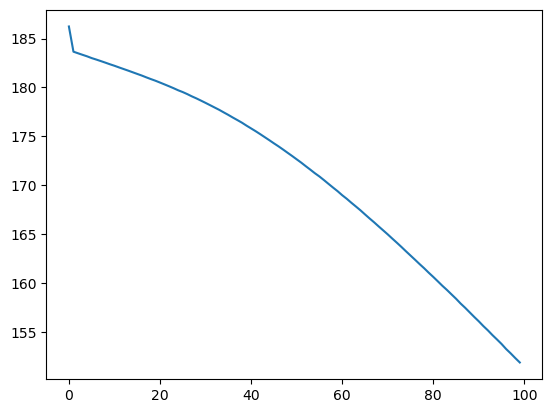

In [29]:
#neural network
#If in 
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

#plot the loss
plt.plot(history.history['loss'], label='train')

#print the accuracy
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracy